In [1]:
import pandas as pd
import os 
import glob
import json
from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
# This function is used to check following conditions in the paired antibody sequences:
  # - Only 20 amino acid letters present in the sequence (No unknown residues(X))
  # - Sequence is complete ( All CDR's and FWR's are present in both heavy and light chain of antibody sequence)
# Sequences that does not satisfy above conditions will be filtered out from the dataset 


valid_amino_acids = set("ACDEFGHIKLMNPQRSTVWY")  # A set of 20 amino acids

# Convert valid amino acids to a regular expression pattern
valid_amino_acids_pattern = f'^[{ "".join(valid_amino_acids) }]*$'

# List of required columns
required_columns = [
    "sequence_alignment_aa_heavy",
    "sequence_alignment_aa_light",
    *[f"fwr{i}_aa_heavy" for i in range(1, 5)],
    *[f"cdr{i}_aa_heavy" for i in range(1, 4)],
    *[f"fwr{i}_aa_light" for i in range(1, 5)],
    *[f"cdr{i}_aa_light" for i in range(1, 4)],
    "v_call_heavy",
    "v_call_light",
]

In [3]:
print(pd.__version__)

2.2.2


In [4]:
# Paired human antibody sequences dataset is downloaded from the OAS database
# This dataset contains paired heavy and light chain sequences of human antibodies
dir = '/data/hn533621/InSilico-Ab-Discovery/Paired_Seq_Data_Analysis/'
os.chdir(dir)

### Read all filescsv  from the dataset 

In [7]:
files = glob.glob('/data/hn533621/OAS/Paired_sequences_29_Nov_24/*.csv')
print(len(files))

280


In [8]:
# This code is processing each csv file and filtering out the sequences that does not satisfy the conditions mentioned above
# All the data is saved in a single csv file with metadat added to each sequence to track its origin 

# Initialize a list to store DataFrames
dataframes = []

# Process each file
for file in tqdm(files, desc="Processing files"):
    #print(file)
    
    # Read metadata
    json_data = pd.read_csv(file, nrows=0).columns.tolist()
    metadata = {"columns": json_data, "column_count": len(json_data)}
    metadata_json = json.dumps(metadata)
    metadata_dict = json.loads(metadata['columns'][0].replace('""', '"'))

    # Extract metadata fields
    Species = metadata_dict["Species"]
    Age = metadata_dict["Age"]
    BSource = metadata_dict["BSource"]
    BType = metadata_dict["BType"]
    Subject = metadata_dict["Subject"]
    Disease = metadata_dict["Disease"]
    Vaccine = metadata_dict["Vaccine"]
    Isotype = metadata_dict["Isotype"]

     # Read the columns (header=1, so the column names are in row 1)
    columns = pd.read_csv(file, nrows=0, header=1).columns.tolist()

    # Check if all required columns are present in the file (data part)
    missing_columns = [col for col in required_columns if col not in columns]
    
    # If any required columns are missing, skip the file and continue with the next one
    if missing_columns:
        print(f"File {file} is missing the following required columns: {missing_columns}")
        continue

    # Read the CSV file with the required columns
    try:
        df = pd.read_csv(file, usecols=required_columns, header=1)
    except ValueError as e:
        print(f"Error reading file {file}: {e}")
        continue
        
    #print(df.head())
    ## Filter rows with valid amino acid sequences in the alignment columns
    df = df[
        df['sequence_alignment_aa_heavy'].str.match(valid_amino_acids_pattern) &
        df['sequence_alignment_aa_light'].str.match(valid_amino_acids_pattern)
    ]

    #print(df)
#
    # Check for non-empty framework and CDR columns
    non_empty_check = df[
        [
            f"fwr{i}_aa_heavy" for i in range(1, 5)
        ] + [
            f"cdr{i}_aa_heavy" for i in range(1, 4)
        ] + [
            f"fwr{i}_aa_light" for i in range(1, 5)
        ] + [
            f"cdr{i}_aa_light" for i in range(1, 4)
        ]
    ].notnull().all(axis=1)

    # Keep only rows with all non-empty framework and CDR columns
    df = df[non_empty_check]
#
    # Add metadata columns
    df["Species"] = Species
    df["Age"] = Age
    df["BSource"] = BSource
    df["BType"] = BType
    df["Subject"] = Subject
    df["Disease"] = Disease
    df["Vaccine"] = Vaccine
    df["Isotype"] = Isotype
    df["File Name"] = file
#
    ## Append the processed DataFrame to the list
    dataframes.append(df)



Processing files:   5%|▌         | 15/280 [00:02<00:34,  7.68it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/SRR10313335_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']
File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082299_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  18%|█▊        | 49/280 [00:09<00:29,  7.90it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082283_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  25%|██▌       | 70/280 [00:14<00:47,  4.38it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/SRR10313332_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  27%|██▋       | 76/280 [00:15<00:48,  4.18it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082227_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  31%|███▏      | 88/280 [00:18<00:32,  5.91it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082251_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  39%|███▉      | 109/280 [00:22<00:40,  4.20it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/SRR10358523_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  45%|████▌     | 127/280 [00:25<00:24,  6.24it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/SRR10358524_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']
File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082267_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  58%|█████▊    | 162/280 [00:32<00:19,  6.00it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/SRR10358525_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  61%|██████    | 171/280 [00:35<00:33,  3.28it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082303_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  72%|███████▏  | 201/280 [00:41<00:09,  8.75it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082235_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  74%|███████▍  | 207/280 [00:42<00:12,  5.70it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082291_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  86%|████████▋ | 242/280 [00:49<00:08,  4.27it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082243_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files:  98%|█████████▊| 273/280 [00:57<00:02,  3.18it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082263_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


Processing files: 100%|██████████| 280/280 [00:58<00:00,  4.76it/s]

File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082275_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']
File /data/hn533621/OAS/Paired_sequences_29_Nov_24/ERR4082259_paired.csv is missing the following required columns: ['fwr4_aa_heavy', 'fwr4_aa_light']


In [9]:
# Make Age column as the same datatype accross all the files 
for i, df in enumerate(dataframes):
    dataframes[i]['Age'] = dataframes[i]['Age'].astype(str)

In [10]:
# Drop duplicates sequences from the final sequence data 
combined_df = (
    pd.concat(dataframes, ignore_index=True)
    .assign(combined_sequence=lambda df: df['sequence_alignment_aa_heavy'] + df['sequence_alignment_aa_light'])  # Create the new column
    .drop_duplicates(subset='combined_sequence', keep='first')  # Drop duplicates based on the combined sequence
    .drop(columns=['combined_sequence'])  # Optionally drop the combined sequence column
)

In [11]:
combined_df

,v_call_heavy,sequence_alignment_aa_heavy,fwr1_aa_heavy,cdr1_aa_heavy,fwr2_aa_heavy,cdr2_aa_heavy,fwr3_aa_heavy,fwr4_aa_heavy,cdr3_aa_heavy,v_call_light,...,cdr3_aa_light,Species,Age,BSource,BType,Subject,Disease,Vaccine,Isotype,File Name
0,IGHV3-11*06,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...,QVQLVESGGGLVKPGGSLRLSCAAS,GFTFSDYY,MSWIRQAPGKGLEWVSY,ISSSSSYI,NYADSVKGRFTISRDNAKNSLYLQMNSLRAEDTAVYYC,WGQGTTVTVSS,ARAKPHDYSNYYYYGMDV,IGLV3-1*01,...,QAWDSSTVV,human,65 to 70,transverse-colon,Unsorted-B-Cells,390c,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...
1,IGHV4-38-2*02,QVQLQESGPGLVKPLETLSLTCTVSGYYISDGYFWAWIRQPPGKGL...,QVQLQESGPGLVKPLETLSLTCTVS,GYYISDGYF,WAWIRQPPGKGLEWLGA,LYHTGTT,YYNPSLKRRVTISVDTSKNQLSLRLNSVTAADTAVYYC,WGQGTLVTVSS,ARDPTPGTPVDY,IGKV1-17*01,...,LQHNIYPRT,human,no,PBMC,Memory-B-Cells,Donor-1,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...
2,IGHV4-39*07,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWGWIRQPPGKG...,QLQLQESGPGLVKPSETLSLTCTVS,GGSISSSSYY,WGWIRQPPGKGLEWIGS,IYYSGST,YYNPSLKSRVTISVDTSKNQFSLKLSSVTAADTAVYYC,WGQGTLVTVSS,ARIQRIAAAGTTLDY,IGKV4-1*01,...,QQYYSTPLFT,human,no,PBMC,Memory-B-Cells,Donor-1,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...
3,IGHV4-34*01,QVQLQQWGAGLLKPSETLSLTCSVYGGTFSGYYWTWIRQPPGKGLE...,QVQLQQWGAGLLKPSETLSLTCSVY,GGTFSGYY,WTWIRQPPGKGLEWIGE,INHSGST,NYNPSLKSRVTISVDTSKNQFSLKLSSVTAADTAVYYC,WGRGTLVTVSS,ARRAGGYCDSSACSTYWYLDV,IGLV1-40*01,...,QSYDTSLSSWV,human,no,PBMC,Memory-B-Cells,Donor-1,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...
4,IGHV4-30-4*01,QVQVQESGPGLVKPSQTLSLTCTVSDGSISGGYFYWSWIRQPPGKG...,QVQVQESGPGLVKPSQTLSLTCTVS,DGSISGGYFY,WSWIRQPPGKGLEWVGS,IHHSGNT,YYNPALESRVTVSIDTSMKQFSLKMRSVTAADTAVYFC,WGQGTRVIVSS,ARGEATVMMFPPDY,IGLV2-14*03,...,ASYRTDTIV,human,no,PBMC,Memory-B-Cells,Donor-1,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914166,IGHV3-23*01,EVQLLESGGGLVQPGGSLRLSCAASGFTFSNYAMRWVRQAPGKGLE...,EVQLLESGGGLVQPGGSLRLSCAAS,GFTFSNYA,MRWVRQAPGKGLECVSH,ITGSGDST,YHADSVKGRFTISRDNFKNTVYLQMNSLRAEDTAVYYC,WGQGTLVTVSS,AKGYSSSSFHH,IGKV4-1*01,...,QQYYNTLWT,human,no,PBMC,Plasma-B-Cells,Donor-1,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...
1914167,IGHV4-59*13,QVQLQESGPGLVKPSETLSLTCTVSGGSISSSYWTWIRQPPGRGLE...,QVQLQESGPGLVKPSETLSLTCTVS,GGSISSSY,WTWIRQPPGRGLEWIGC,IYHSGFT,KYNPSLKSRVTISIDTSKNQFSLKLTSVTAADTAVYYC,WSQGTLVTVSS,ARDLYYYDNSGYLP,IGKV1D-12*01,...,QQANNFPWT,human,no,PBMC,Plasma-B-Cells,Donor-1,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...
1914168,IGHV1-18*01,QVQLVQSEAEVKKPGASVKVSCQPSGYTFNNSAITWVRQAPGRGLE...,QVQLVQSEAEVKKPGASVKVSCQPS,GYTFNNSA,ITWVRQAPGRGLEWMGW,ISSYNGNT,QYARVLQGRVTMTTDTSTSTVYLELRSLRSDDTAVYFC,WGQGTLVTVSS,ASGGSCTSRSCFVDGLDI,IGKV1-9*01,...,QQVVNYPLT,human,no,PBMC,Plasma-B-Cells,Donor-1,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...
1914172,IGHV3-30*18,QVQLVESGGGVVQPGGSLRLSCAASGFTFRSYGMQWVRQAPGKGLE...,QVQLVESGGGVVQPGGSLRLSCAAS,GFTFRSYG,MQWVRQAPGKGLEWVAV,ISADGGQT,HYAESVKGRFTISRDNSKNTLHLQMTTLRPADTAIYYC,WGQGTLVTVSS,VKEADGAIGTTFDY,IGKV3-11*01,...,QQRASWEECS,human,no,PBMC,Plasma-B-Cells,Donor-1,None,None,All,/data/hn533621/OAS/Paired_sequences_29_Nov_24/...


In [12]:
combined_df.to_csv('Quality_checked_paired_seq.csv', index=False)

### Histogram of length of VH and VL

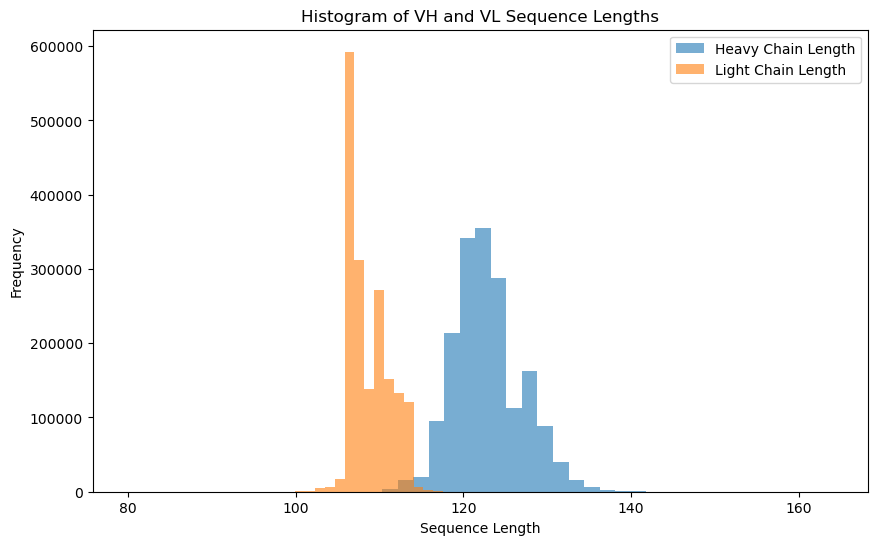

In [17]:
# After each sequence is quality checked, this code is used to calculate the length of each heavy and light sequence and plot a histogram of the sequence lengths
# Calculate the length of the sequences in 'sequence_alignment_aa_heavy' and 'sequence_alignment_aa_light' using str.len()

combined_df['heavy_length'] = combined_df['sequence_alignment_aa_heavy'].str.len()
combined_df['light_length'] = combined_df['sequence_alignment_aa_light'].str.len()

# Create histograms
plt.figure(figsize=(10, 6))

# Plot for 'sequence_alignment_aa_heavy'
plt.hist(combined_df['heavy_length'], bins=40, alpha=0.6, label='Heavy Chain Length')

# Plot for 'sequence_alignment_aa_light'
plt.hist(combined_df['light_length'], bins=40, alpha=0.6, label='Light Chain Length')

# Add labels and title
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Histogram of VH and VL Sequence Lengths')

# Add a legend
plt.legend()

plt.savefig('Histogram_of_VH_and_VL_Sequence_Lengths.png', dpi=300)

# Display the plot
plt.show()


### Add V gebe for VH and VL

In [18]:
# Remove the further classification of the V genes 
# Eg. IGKV1-9*01 -> IGKV1 
combined_df['v_heavy'] = combined_df['v_call_heavy'].str.split('-', expand=True)[0]
combined_df['v_light'] = combined_df['v_call_light'].str.split('-', expand=True)[0]

In [19]:
# Here idea is to find out the v gene pairs in heavy and light chains that occured most frequently 
# Group the V heavy and V light pairs

v_gene_counts = combined_df.groupby(['v_heavy', 'v_light']).size().reset_index(name='count')

# Sort by count in descending order
v_gene_counts_sorted = v_gene_counts.sort_values('count', ascending=False)
print(v_gene_counts_sorted)

    v_heavy v_light   count
41    IGHV3   IGKV1  232940
45    IGHV3   IGKV3  175335
62    IGHV4   IGKV1  107117
53    IGHV3   IGLV2   96163
54    IGHV3   IGLV3   94501
..      ...     ...     ...
40    IGHV3   IGHV3       5
143   IGLV2   IGLV2       2
61    IGHV4   IGHV4       1
109   IGHV6   IGKV5       1
142  IGKV1D   IGKV1       1

[144 rows x 3 columns]


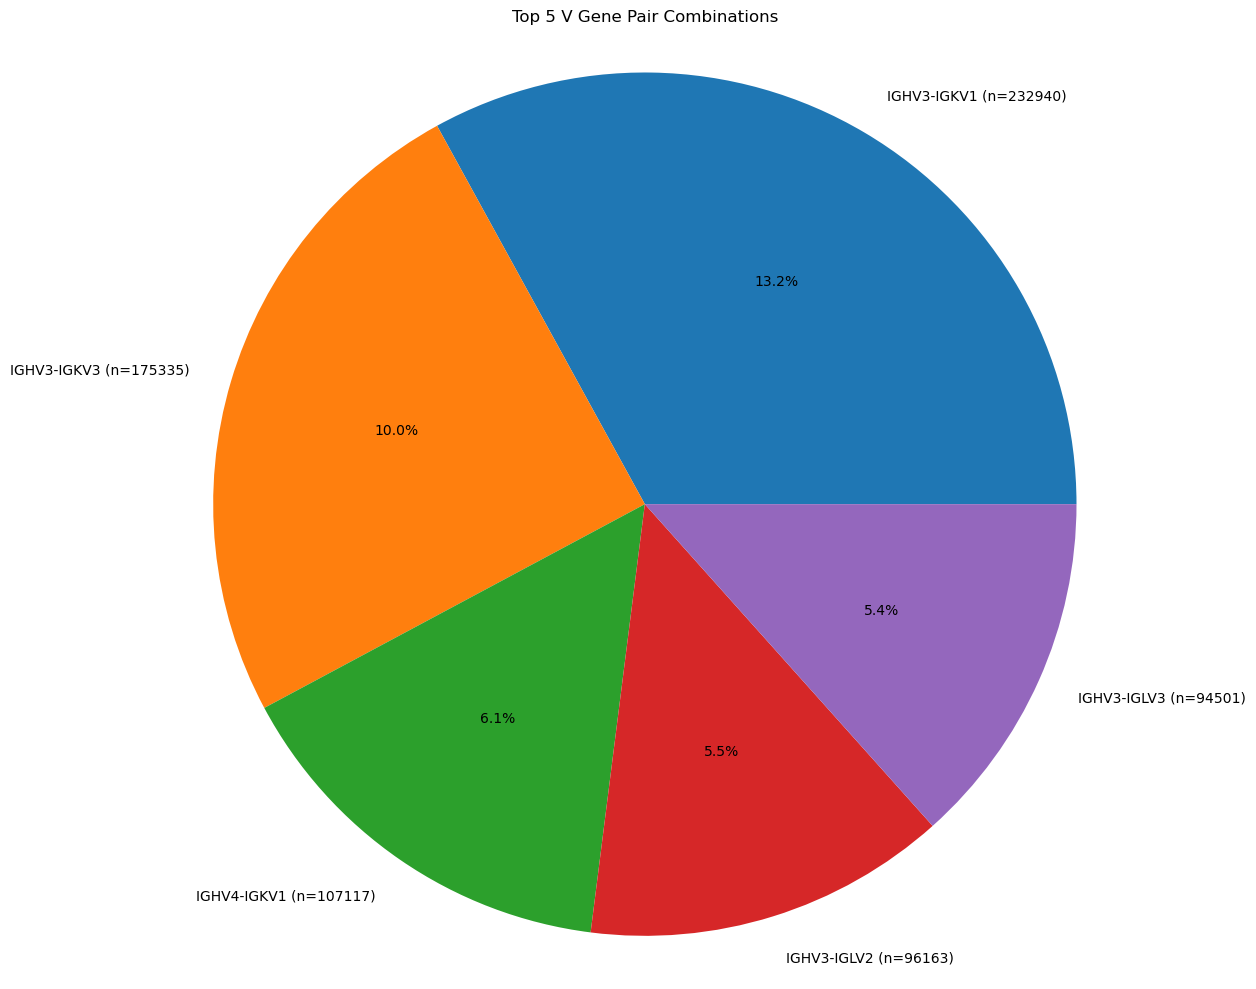

Top 5 V Gene Pair Combinations (Percentage of Total Pairs):
IGHV3-IGKV1: 232940 pairs (13.22%)
IGHV3-IGKV3: 175335 pairs (9.95%)
IGHV4-IGKV1: 107117 pairs (6.08%)
IGHV3-IGLV2: 96163 pairs (5.46%)
IGHV3-IGLV3: 94501 pairs (5.36%)


In [26]:
# Pie chart of the top 5 V gene pair combinations

# Select top 5 combinations
top_5_pairs = v_gene_counts_sorted.head(5)

top_5_pairs_pd = top_5_pairs

# Total count of all pairs
total_pairs = v_gene_counts_sorted['count'].sum()

# Calculate percentages based on the total number of pairs
percentages = (top_5_pairs_pd['count'] / total_pairs) * 100

# Create pie chart
plt.figure(figsize=(12, 10))
plt.pie(
    top_5_pairs_pd['count'], 
    labels=[f"{row['v_heavy']}-{row['v_light']} (n={row['count']})" for _, row in top_5_pairs_pd.iterrows()], 
    autopct=lambda pct: f"{(pct / 100) * percentages.sum():.1f}%"
)
plt.title('Top 5 V Gene Pair Combinations')
plt.axis('equal')  
plt.tight_layout()
plt.savefig('Top_5_V_Gene_Pair_Combinations.png', dpi=300)
plt.show()


# Print the detailed breakdown with percentages from the overall dataset
print("Top 5 V Gene Pair Combinations (Percentage of Total Pairs):")
for _, row in top_5_pairs_pd.iterrows():
    overall_percentage = (row['count'] / total_pairs) * 100
    print(f"{row['v_heavy']}-{row['v_light']}: {row['count']} pairs ({overall_percentage:.2f}%)")



### CDR's length distribution of paired antibody sequences

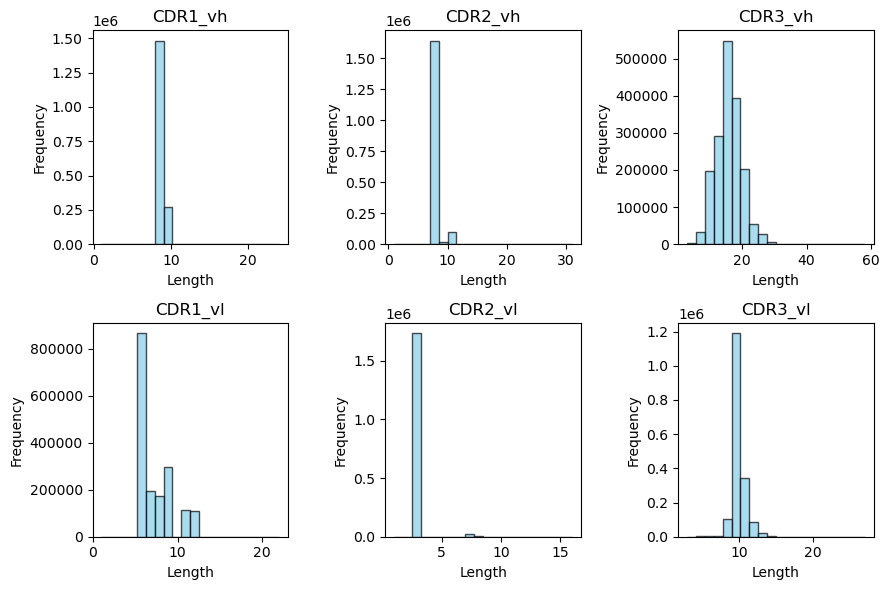

In [30]:
# lengths of the CDR sequences for heavy and light chains
combined_df['cdr1_heavy_len'] = combined_df['cdr1_aa_heavy'].str.len()
combined_df['cdr2_heavy_len'] = combined_df['cdr2_aa_heavy'].str.len()
combined_df['cdr3_heavy_len'] = combined_df['cdr3_aa_heavy'].str.len()

combined_df['cdr1_light_len'] = combined_df['cdr1_aa_light'].str.len()
combined_df['cdr2_light_len'] = combined_df['cdr2_aa_light'].str.len()
combined_df['cdr3_light_len'] = combined_df['cdr3_aa_light'].str.len()

# subplots for heavy and light chain CDR lengths
fig, axes = plt.subplots(2, 3, figsize=(9, 6))

# CDR columns and titles
cdr_columns = [
    ('cdr1_heavy_len', 'cdr2_heavy_len', 'cdr3_heavy_len'),
    ('cdr1_light_len', 'cdr2_light_len', 'cdr3_light_len')
]
titles = [
    ['CDR1_vh', 'CDR2_vh', 'CDR3_vh'],
    ['CDR1_vl', 'CDR2_vl', 'CDR3_vl']
]

# Plot histograms
for i in range(2):  # 0 for heavy, 1 for light
    for j in range(3):  # 0, 1, 2 for CDR1, CDR2, CDR3
        col = cdr_columns[i][j]
        axes[i, j].hist(combined_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        axes[i, j].set_title(titles[i][j])
        axes[i, j].set_xlabel('Length')
        axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('Histogram_of_CDR_Lengths.png', dpi=300)
plt.show()


### Frame work regions (FWR's) length distribution of paired antibody sequences

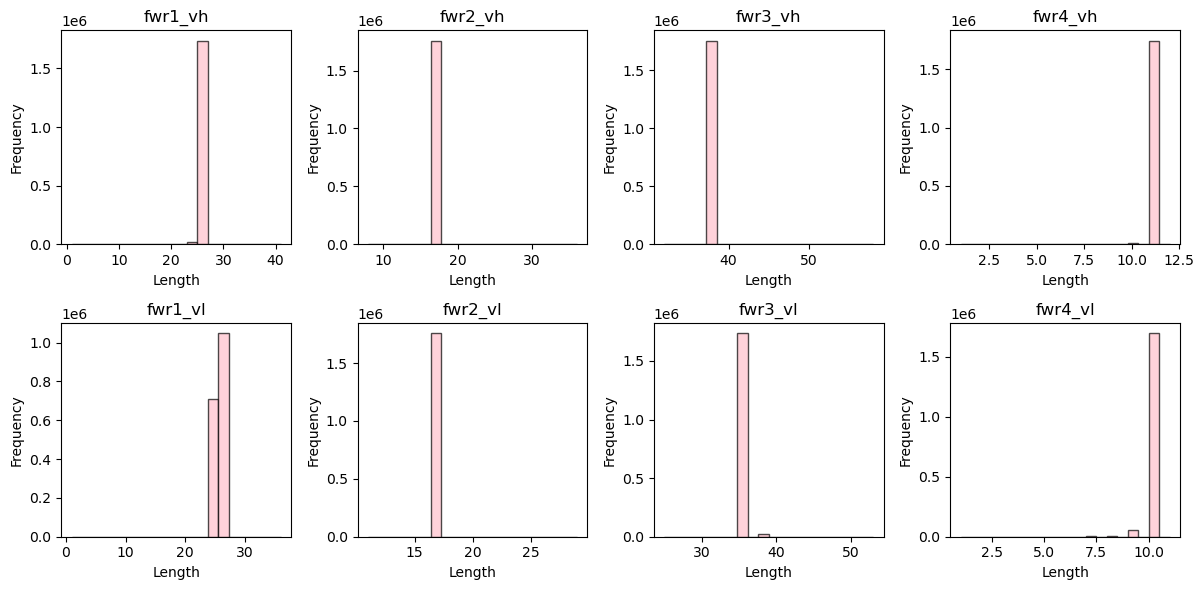

In [33]:
# lengths of the FWR sequences for heavy and light chains
combined_df['fwr1_heavy_len'] = combined_df['fwr1_aa_heavy'].str.len()
combined_df['fwr2_heavy_len'] = combined_df['fwr2_aa_heavy'].str.len()
combined_df['fwr3_heavy_len'] = combined_df['fwr3_aa_heavy'].str.len()
combined_df['fwr4_heavy_len'] = combined_df['fwr4_aa_heavy'].str.len()

combined_df['fwr1_light_len'] = combined_df['fwr1_aa_light'].str.len()
combined_df['fwr2_light_len'] = combined_df['fwr2_aa_light'].str.len()
combined_df['fwr3_light_len'] = combined_df['fwr3_aa_light'].str.len()
combined_df['fwr4_light_len'] = combined_df['fwr4_aa_light'].str.len()

# Create subplots for heavy and light chain FWR lengths
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # Adjusted for 4 FWR regions

# Define FWR columns and titles
fwr_columns = [
    ('fwr1_heavy_len', 'fwr2_heavy_len', 'fwr3_heavy_len', 'fwr4_heavy_len'),
    ('fwr1_light_len', 'fwr2_light_len', 'fwr3_light_len', 'fwr4_light_len')
]
titles = [
    ['fwr1_vh', 'fwr2_vh', 'fwr3_vh', 'fwr4_vh'],
    ['fwr1_vl', 'fwr2_vl', 'fwr3_vl', 'fwr4_vl']
]

# Plot histograms
for i in range(2):  # 0 for heavy, 1 for light
    for j in range(4):  # 0, 1, 2, 3 for FWR1, FWR2, FWR3, FWR4
        col = fwr_columns[i][j]
        axes[i, j].hist(combined_df[col], bins=20, color='pink', edgecolor='black', alpha=0.7)
        axes[i, j].set_title(titles[i][j])
        axes[i, j].set_xlabel('Length')
        axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('Histogram_of_FWR_Lengths.png', dpi=300)
plt.show()
